In [1]:
numbers = [-25, -16, -12, -9, -5, -2, 0, 3, 6, 8, 10, 11, 14, 15, 18, 20, 21, 24, 27, 30]

final_numbers = [
    x for x in numbers
    if ((x % 2 == 0) or (abs(x) > 10)) and (x % 4 != 0)
]

mean_value = sum(final_numbers) / len(final_numbers)

print(final_numbers)
print(mean_value)


[-25, -2, 6, 10, 11, 14, 15, 18, 21, 27, 30]
11.363636363636363


In [3]:
import numpy as np


data = np.random.uniform(0, 100, 500)
mean = np.mean(data)
std = np.std(data)


filtered = data[data > (mean + 0.5 * std)]
percentage = (len(filtered) / len(data)) * 100

print("Standard Deviation:", std)
print("Remaining count:", len(filtered))
print("Remaining percentage:", percentage)


Standard Deviation: 27.551112787391983
Remaining count: 175
Remaining percentage: 35.0


In [4]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    "age": np.random.randint(18, 66, 50),
    "income": np.random.randint(30000, 150001, 50),
    "visits": np.random.randint(1, 13, 50)
})

df = df[df["income"] >= 40000]
df["income_per_visit"] = df["income"] / df["visits"]
top_5 = df.sort_values("income_per_visit", ascending=False).head(5)

print(top_5)


    age  income  visits  income_per_visit
44   20  146976       1     146976.000000
11   25  143159       1     143159.000000
26   23  126246       2      63123.000000
31   27  141938       3      47312.666667
17   50   94256       2      47128.000000


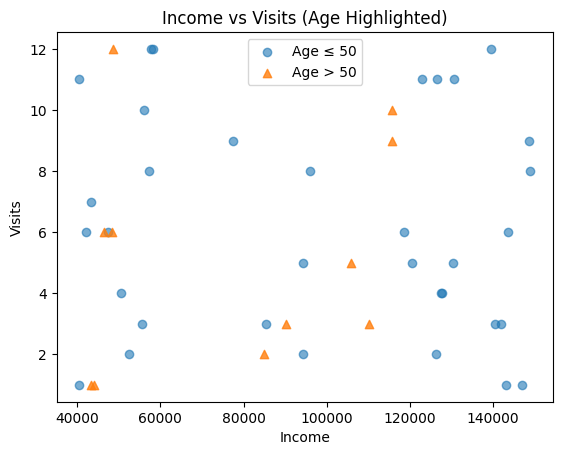

In [5]:
import matplotlib.pyplot as plt


plt.scatter(
    df[df["age"] <= 50]["income"],
    df[df["age"] <= 50]["visits"],
    label="Age ≤ 50",
    alpha=0.6
)

plt.scatter(
    df[df["age"] > 50]["income"],
    df[df["age"] > 50]["visits"],
    label="Age > 50",
    marker="^",
    alpha=0.8
)

plt.xlabel("Income")
plt.ylabel("Visits")
plt.legend()
plt.title("Income vs Visits (Age Highlighted)")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df[["age", "income", "visits"]]
y = ((df["income"] > 90000) & (df["visits"] > 6)).astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
